In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

D:\Installed\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


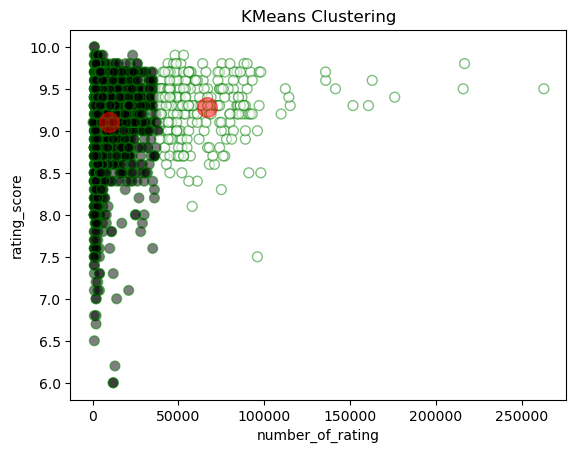

In [2]:
data = pd.read_csv("dataIQIYI-Copy1.csv")
# Xây dựng ma trận dữ liệu đầu vào cho KMeans
X = data[['number_of_rating', 'rating_score', 'Lãng Mạn','Tình Tiết','Thanh Xuân','Thành Thị','Viễn Tưởng','Phim Hài','Bí Ẩn','Hành Động','Cổ Trang','Tình Bạn','Phiêu Lưu','Tội Phạm','Tình Yêu Ngọt Ngào',	'Gia Đình' ,'Nhiệt Huyết','Kinh Dị','Tiểu Thuyết Chuyển Thể','Other']]

# Khởi tạo và fit model KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
# Gán nhãn cho dữ liệu
data['hot'] = kmeans.labels_
# Gán nhãn cho cột "Hot"
#0: unpopular, 1:popular
data['hot'] = data['hot'].map({0: '0', 1: '1'})
plt.scatter(x = data['number_of_rating'], y = data['rating_score'], c=data['hot'], edgecolor='green', s=50, alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('number_of_rating')
plt.ylabel('rating_score')
plt.title('KMeans Clustering')
plt.show()


In [5]:
X

,number_of_rating,rating_score,Lãng Mạn,Tình Tiết,Thanh Xuân,Thành Thị,Viễn Tưởng,Phim Hài,Bí Ẩn,Hành Động,Cổ Trang,Tình Bạn,Phiêu Lưu,Tội Phạm,Tình Yêu Ngọt Ngào,Gia Đình,Nhiệt Huyết,Kinh Dị,Tiểu Thuyết Chuyển Thể,Other
0,14000,8.4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1600,9.4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4800,9.3,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1
3,56800,9.7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,8900,9.6,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,2300,9.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1606,6100,9.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1607,33500,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1608,6000,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
print(data[['number_of_rating', 'rating_score', 'hot']])
data.to_csv("dataIQIYI-Copy1.csv", index=False)

      number_of_rating  rating_score hot
0                14000           8.4   0
1                 1600           9.4   0
2                 4800           9.3   0
3                56800           9.7   1
4                 8900           9.6   0
...                ...           ...  ..
1605              2300           9.6   0
1606              6100           9.6   0
1607             33500           9.4   0
1608              6000           9.4   0
1609              4600           9.7   0

[1610 rows x 3 columns]


In [7]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7596557588398583
